<a href="https://colab.research.google.com/github/Nipuni-Peiris/BlackFridayPulse_EDA/blob/main/BalckFridaySales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#import the dataset
df = pd.read_csv('BlackFridaySales.csv')

In [57]:
#view first 5 raws of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [58]:
#information about the data columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [59]:
#shape of the dataset
df.shape

(550068, 12)

In [60]:
#summary of all the numerical columns in the dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [61]:
#summary of all the non-numerical columns in the dataset
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


##**DATA CLEANING AND PREPROCESSING**

---


In [62]:
#Count of the duplicated rows in the dataset
df.duplicated().sum()

np.int64(0)

*So, there are no duplicated rows in this dataset*

In [63]:
#Count of the null value rows of this dataset
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


*There are Null values in the Product_Category_2 and Product_Category_3 columns, and there are 173638 in category_2 and 383247 in category_3.*

In [64]:
#finding how much data in Product_Category_2 is having null values compared to the all the rows of the dataset
df['Product_Category_2'].isnull().mean()

np.float64(0.3156664266963357)

In [65]:
#finding how much data in Product_Category_3 is having null values compared to the all the rows of the dataset
df['Product_Category_3'].isnull().mean()

np.float64(0.6967265865311197)

*So, these two values are more than 5%. Then it is not suitable for drop those raws*

In [66]:
#finding the distinct values in the column Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [67]:
#filling the null values with the "Missing" label and converting the all the values in the column to string datatype
df['Product_Category_2'].fillna('Missing', inplace=True)
df['Product_Category_2'] = df['Product_Category_2'].astype(str)

df['Product_Category_3'].fillna('Missing', inplace=True)
df['Product_Category_3'] = df['Product_Category_3'].astype(str)
df.isnull().sum()


<ipython-input-67-02bc074b046d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna('Missing', inplace=True)
<ipython-input-67-02bc074b046d>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Product_Category_2'].fillna('Missing', inplace=True)
<ipython-input-67-02bc074b046d>:5: FutureWarning: A value is trying to be

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [68]:
#Changing the data types
df['Product_Category_1'] = df['Product_Category_1'].astype(str)
df['User_ID'] = df['User_ID'].astype(str)
df['Occupation'] = df['Occupation'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category_1          550068 non-null  object
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 50.4+ MB


##**UNIVARIATE ANALYSIS**

---



In [70]:
#number of distinct values in the product_ID
df["Product_ID"].nunique()

3631

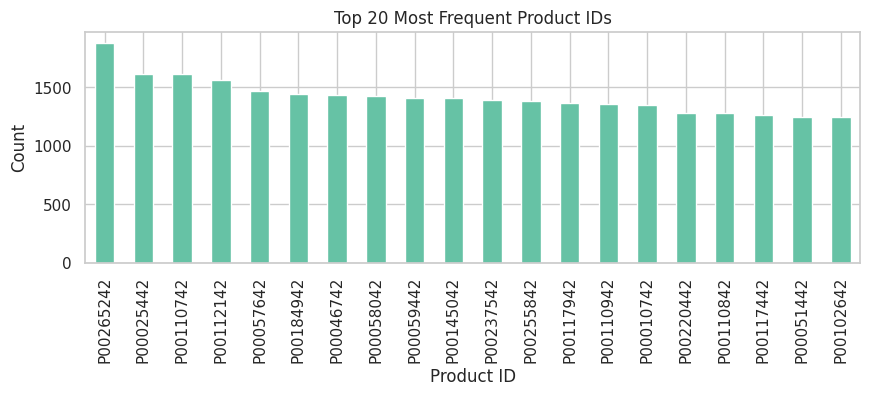

In [71]:
#tp 10 distinct categories in the product_ID and their counts
top20_productID = df['Product_ID'].value_counts().head(20)
top20_productID.plot(kind='bar', figsize=(10,3))
plt.title("Top 20 Most Frequent Product IDs")
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.show()



*   These are the most commonly purchased products
*   Some products were purchased significantly more often, indicating high popularity or frequent promotion




<ipython-input-72-56b1f0e731e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df,palette='Set1')


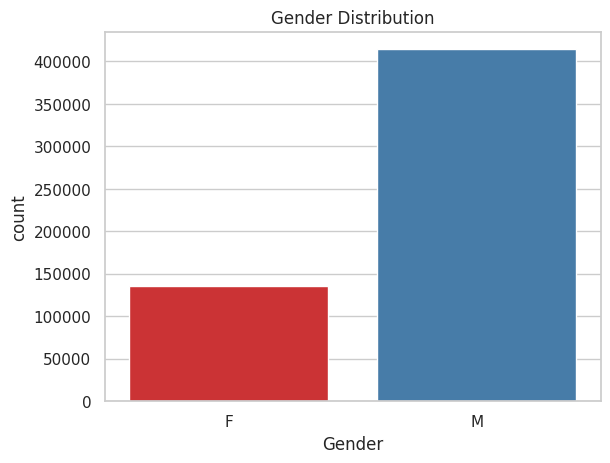

In [72]:
#gender distribution
sns.countplot(x='Gender', data=df,palette='Set1')
plt.title("Gender Distribution")
plt.show()



*   More males participated in the sales than females




In [73]:
#number of distinct age categories in the age column
df["Age"].nunique()

7

<ipython-input-74-8967e0c85fca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df,palette='Set1')


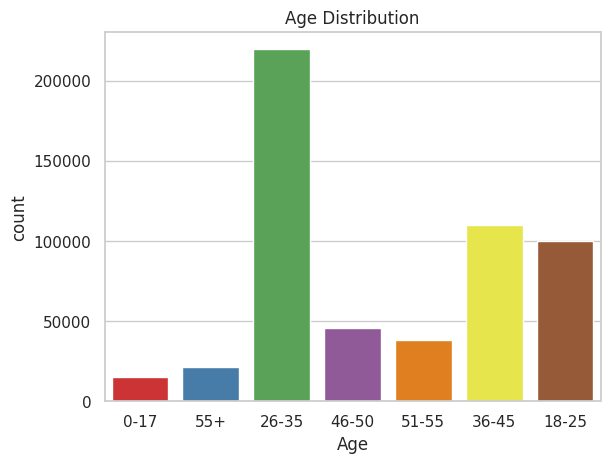

In [74]:
#age distribution
sns.countplot(x='Age', data=df,palette='Set1')
plt.title("Age Distribution")
plt.show()



*   The majority of buyers were between 26–35 years old.
*   This age group is likely the most active or financially capable in the Black Friday sale.



In [75]:
#number of distinct occupation categories in the occupation column
df["Occupation"].nunique()

21

<ipython-input-77-f3d82264d418>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=df,palette='Set1')


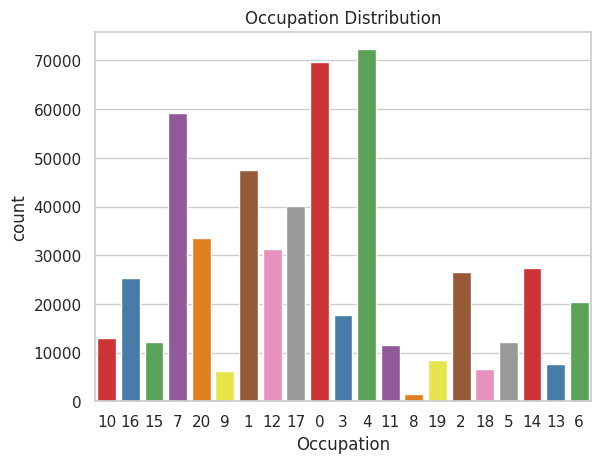

In [77]:
#distribution of occupation
sns.countplot(x='Occupation', data=df,palette='Set1')
plt.title("Occupation Distribution")
plt.show()



*  Occupation IDs like 0, 4, and 7 were dominant.



In [78]:
#number of distinct City_Category categories in the City_Category column
df["City_Category"].nunique()

3

<ipython-input-81-c46b0955a82f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City_Category', data=df,palette='Set1')


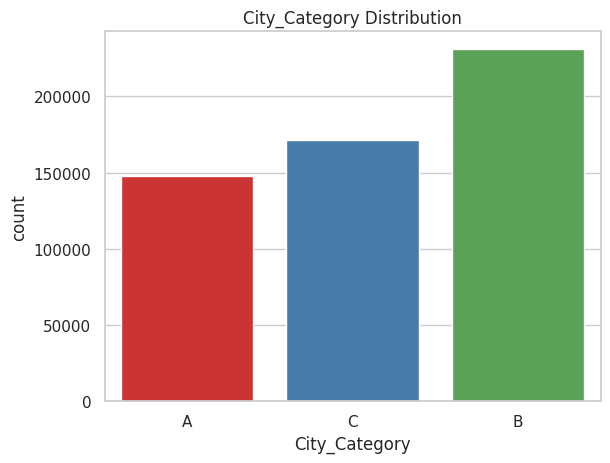

In [81]:
#distribution of City_Category
sns.countplot(x='City_Category', data=df,palette='Set1')
plt.title("City_Category Distribution")
plt.show()



*   City B had the most customers, followed by C and A




<ipython-input-82-3cd146ce0813>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=df,palette='Set1')


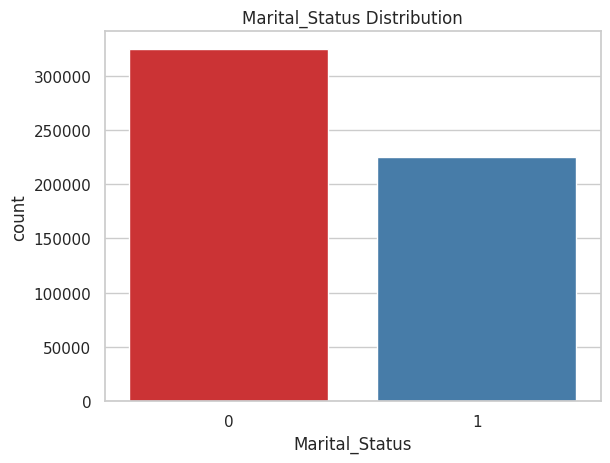

In [82]:
#distribution of Marital_Status
sns.countplot(x='Marital_Status', data=df,palette='Set1')
plt.title("Marital_Status Distribution")
plt.show()

*Considering as 'o' indicate the unmarried people and '1' indicate the married people*


*   Unmarried people shopped more than married ones
*   Possibly due to more disposable income or fewer responsibilities



In [105]:
#number of distinct Product_Category_1 categories in the Product_Category_1 column
df["Product_Category_1"].nunique()

20

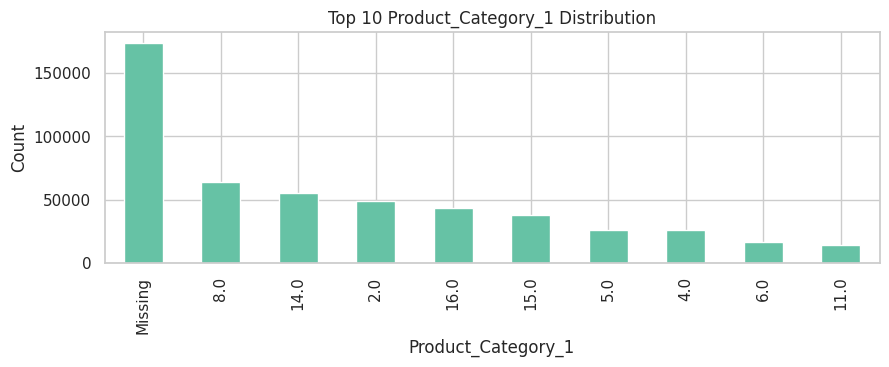

In [106]:
#distribution of Product_Category_1
TopProduct_Category_1 = df['Product_Category_2'].value_counts().head(10)

TopProduct_Category_1.plot(kind='bar', figsize=(10, 3))
plt.title("Top 10 Product_Category_1 Distribution")
plt.xlabel("Product_Category_1")
plt.ylabel("Count")
plt.show()


In [85]:
#number of distinct Product_Category_2 categories in the Product_Category_2 column
df["Product_Category_2"].nunique()

18

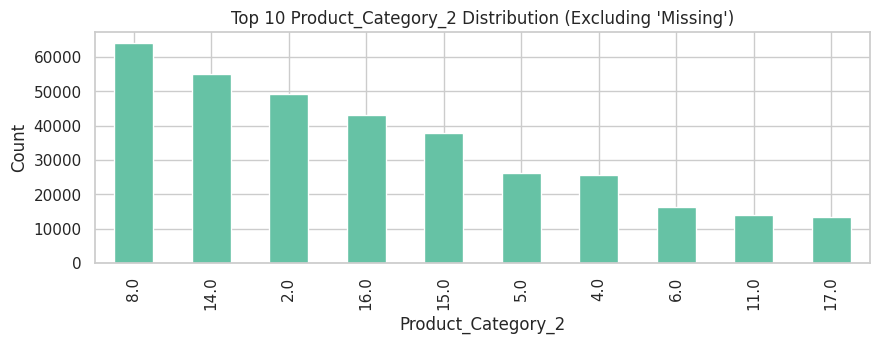

In [86]:
#distribution of Product_Category_2
TopProduct_Category_2 = df[df['Product_Category_2'] != 'Missing']['Product_Category_2'].value_counts().head(10)

TopProduct_Category_2.plot(kind='bar', figsize=(10, 3))
plt.title("Top 10 Product_Category_2 Distribution (Excluding 'Missing')")
plt.xlabel("Product_Category_2")
plt.ylabel("Count")
plt.show()


In [87]:
#number of distinct Product_Category_3 categories in the Product_Category_3 column
df["Product_Category_3"].nunique()

16

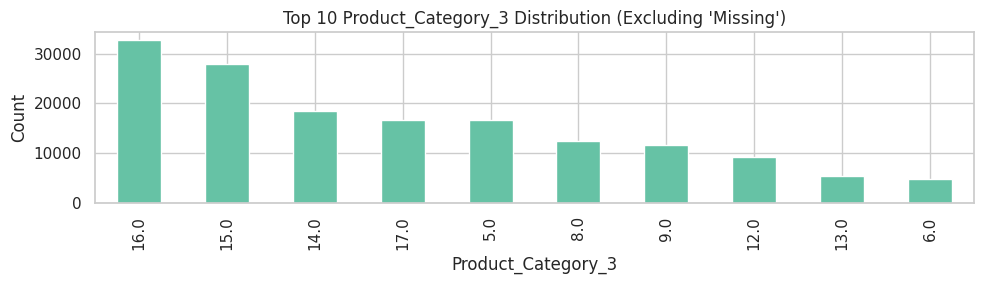

In [88]:
#distribution of Product_Category_3
TopProduct_Category_3 = df[df['Product_Category_3'] != 'Missing']['Product_Category_3'].value_counts().head(10)

TopProduct_Category_3.plot(kind='bar', figsize=(10, 3))
plt.title("Top 10 Product_Category_3 Distribution (Excluding 'Missing')")
plt.xlabel("Product_Category_3")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


##**BIVARIATE ANALYSIS**

---




<ipython-input-92-2ce6a5b6506a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=df,palette='Set1')


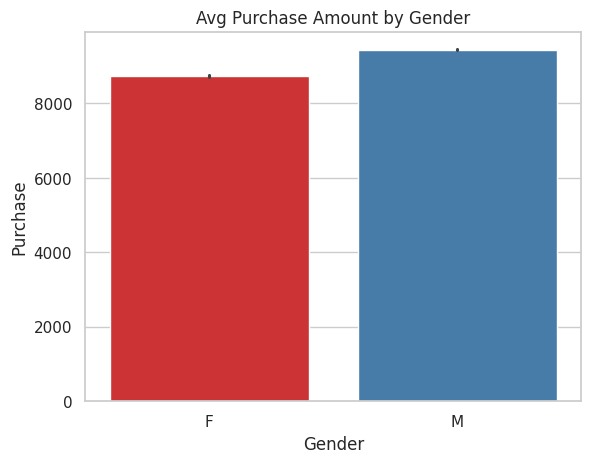

In [92]:
# avg Purchase amount by Gender
sns.barplot(x='Gender', y='Purchase', data=df,palette='Set1')
plt.title("Avg Purchase Amount by Gender")
plt.show()

Males spent slightly more on average than females.

<ipython-input-93-b3beb31f8022>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Purchase', data=df,palette='Set1')


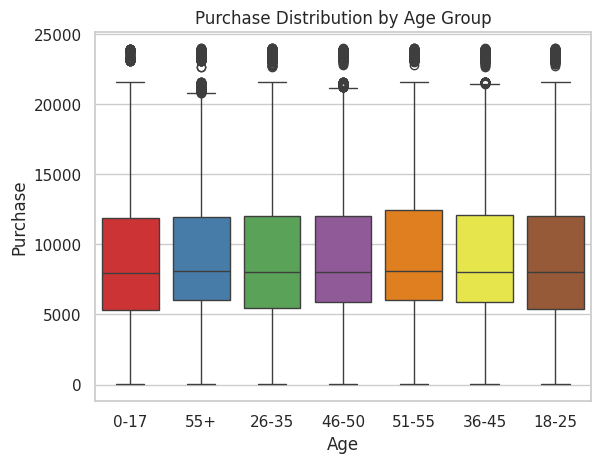

In [93]:
#purchase and age
sns.boxplot(x='Age', y='Purchase', data=df,palette='Set1')
plt.title("Purchase Distribution by Age Group")
plt.show()


<ipython-input-94-12b5d6ec3356>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City_Category', y='Purchase', data=df,palette='Set1')


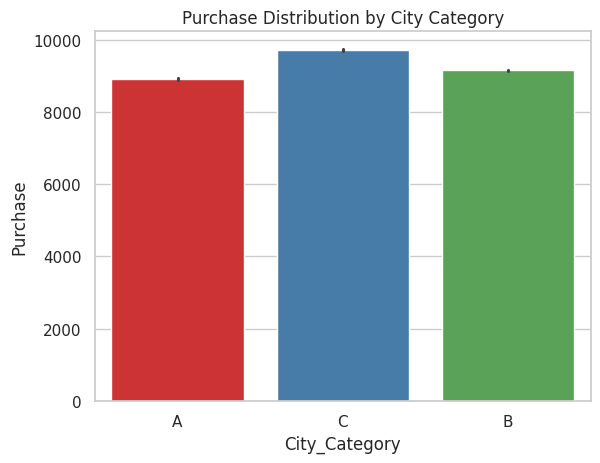

In [94]:
#city category and purchase
sns.barplot(x='City_Category', y='Purchase', data=df,palette='Set1')
plt.title("Purchase Distribution by City Category")
plt.show()

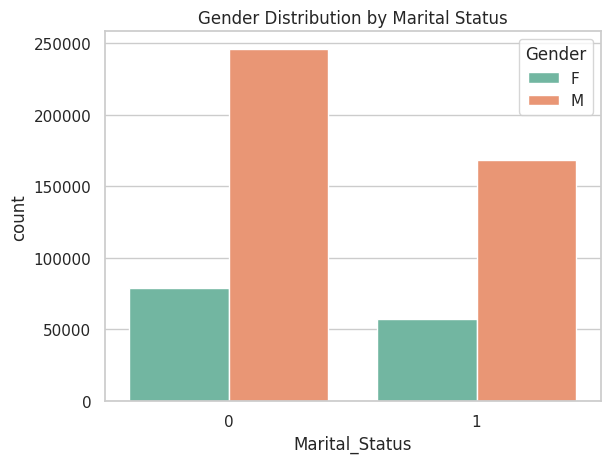

In [95]:
#gender and marital status
sns.countplot(x='Marital_Status', hue='Gender', data=df)
plt.title("Gender Distribution by Marital Status")
plt.show()

<ipython-input-103-df6948f55a56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=df,palette='Set1')


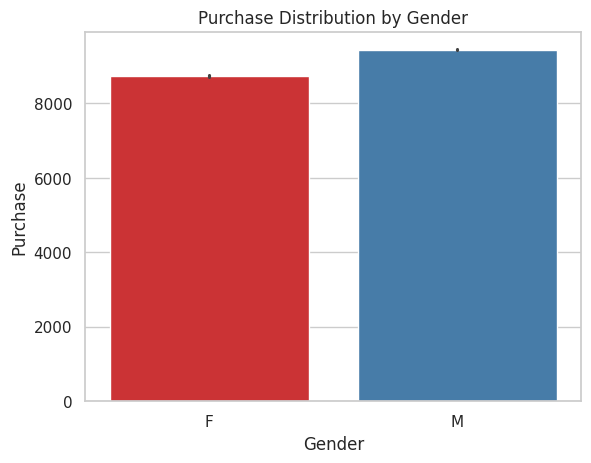

<ipython-input-103-df6948f55a56>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Purchase', data=df,palette='Set1')


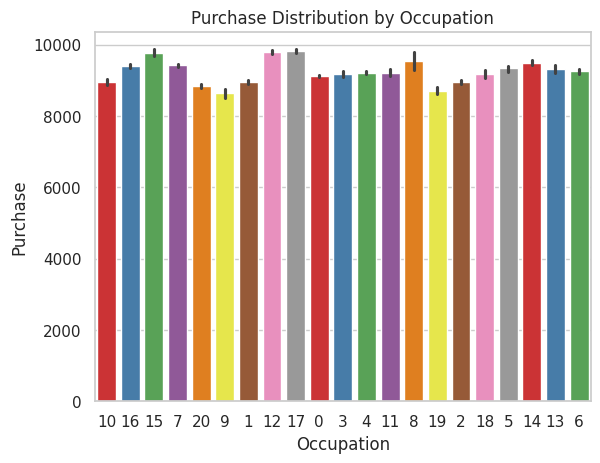

In [103]:
#purchase by gender and puchase by occupation
sns.barplot(x='Gender', y='Purchase', data=df,palette='Set1')
plt.title("Purchase Distribution by Gender")
plt.show()

sns.barplot(x='Occupation', y='Purchase', data=df,palette='Set1')
plt.title("Purchase Distribution by Occupation")
plt.show()